# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = r'C:\Users\Eduardo Fonteneli\Desktop\Biblioteca\PROGRAMAÇÃO\Cientista de Dados - EBAC\Módulo 6/b1abb33c4f.csv'
df1 = pd.read_csv(url)
df1


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
df1['APGAR5'].fillna(9, inplace=True)
plt.close('all')
df1.loc[df1['APGAR5'] < 3, ['clas_apgar']] = 'asfixia grave'
df1.loc[(df1['APGAR5'] > 4) & (df1['APGAR5'] <= 5),
           'clas_apgar'] = 'asfixia moderada'
df1.loc[(df1['APGAR5'] >=5) & (df1['APGAR5'] <= 7),
           'clas_apgar'] = 'asfixia leve'
df1.loc[(df1['APGAR5'] >=8), 'clas_apgar'] = 'normal'
df1['clas_apgar']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: clas_apgar, Length: 27028, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [ ]:
sns.scatterplot(x = 'APGAR5'
                , y = 'GESTACAO'
                , data = df1
                , alpha = .5
                , hue = 'SEXO'
                
               )

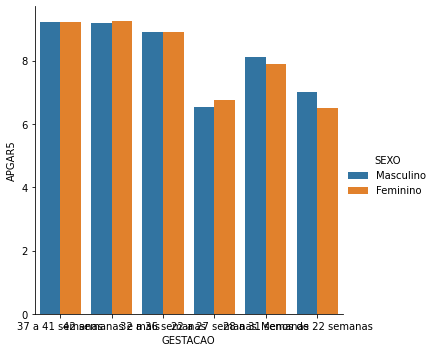

In [7]:
sns.catplot(x='GESTACAO', y='APGAR5'
            , hue = 'SEXO'
            , kind='bar'
            
            , data=df1
            , ci = None)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [8]:
freq = pd.crosstab(df1['GESTACAO'], df1['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,20,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,58,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1322,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13631,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,425,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [9]:
freq.sum(axis = 1) #porlinha
freq_apgar=freq.div(freq.sum(axis = 1), axis = 0)
freq_apgar

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.081395,0.000000,0.093023,0.069767,0.011628,0.000000,0.023256,0.116279,0.279070,0.232558,0.093023
28 a 31 semanas,0.000000,0.000000,0.012121,0.006061,0.030303,0.042424,0.042424,0.066667,0.369697,0.351515,0.078788
32 a 36 semanas,0.000889,0.000889,0.000889,0.000889,0.003557,0.004891,0.007559,0.024900,0.160960,0.587817,0.206759
37 a 41 semanas,0.000221,0.000885,0.000133,0.000221,0.000310,0.000930,0.001992,0.006685,0.062730,0.603435,0.322458
42 semanas e mais,0.001429,0.000000,0.000000,0.000000,0.000000,0.001429,0.001429,0.007143,0.062857,0.607143,0.318571
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

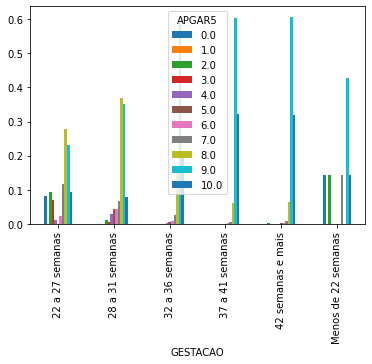

In [10]:
freq_apgar.plot.bar()

Levando em consideração que até 5 é uma asfixia já complexa para o bb, os nascidos de até 36 semanas possuem um percentual maior de APGAR5 nessa faixa, o que corrobora a fala dos médicos. Os nascidos em mais  que 37 semanas tem uma frequencia baixa de APGAR5 menor que 8.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

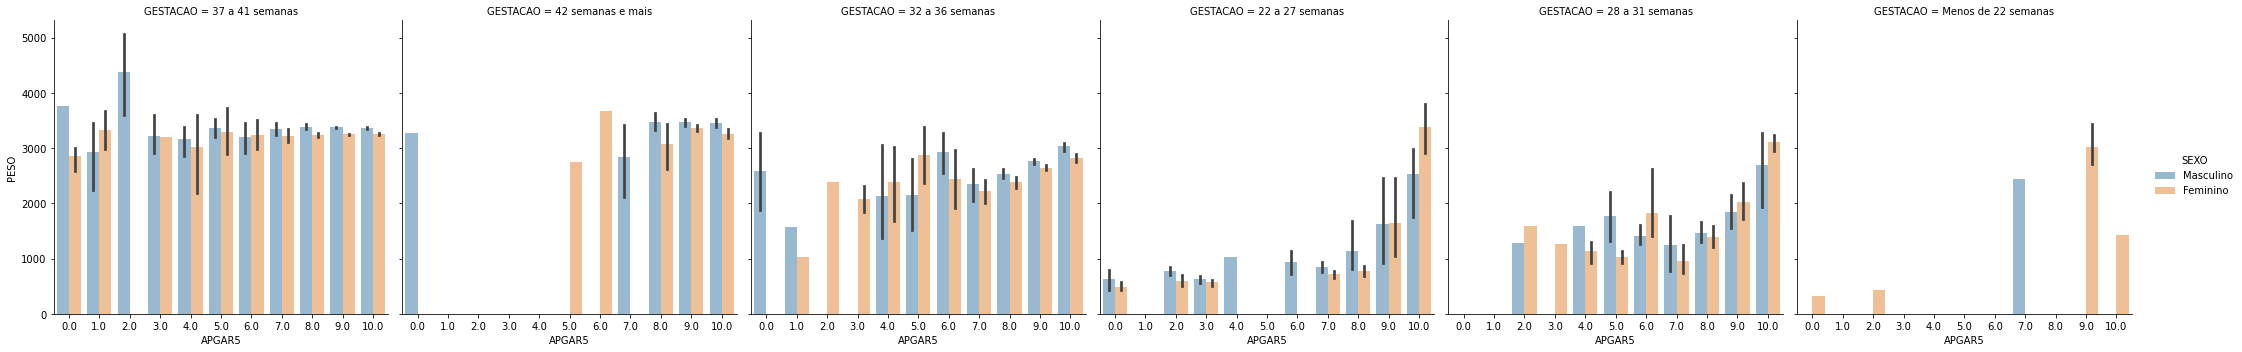

In [11]:
sns.catplot(x = 'APGAR5'
                , y = 'PESO'
                , col='GESTACAO'
                , data = df1
                , alpha = .5
                , kind= 'bar'
                , hue = 'SEXO')

Com menos de 37 semanas aqueles que apresentam um peso fora do comum, menor que 3,5kg, apresentam um APAR5 mais baixo que o ideal, os que apresentam APGAR5 ideal ainda são os com um peso dentro do padrão.
Já aqueles que passam das 37 semanas de gestação, e que possuem APGAR5 abaixo do ideal também mostram uma tendência a pesar menos que o padrão.

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

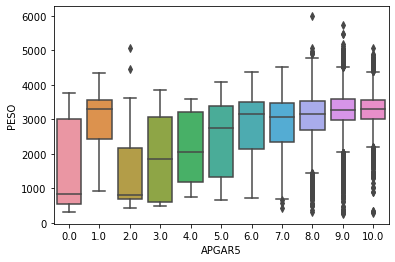

In [15]:
sns.boxplot(data=df1, x='APGAR5', y='PESO')